In [3]:
from wand.image import Image as WImage
from wand.color import Color
def show_pdf(pdffile):
    img = WImage(filename = pdffile)
    bg = WImage(width = img.width, height = img.height, background = Color("white"))
    bg.composite(img,0,0)
    return bg

In [6]:
#show_pdf("c:/sk/tests/rezept.pdf")

In [32]:
from reportlab.pdfgen import canvas
from reportlab.graphics import renderPDF
from reportlab.lib.units import cm
from reportlab.lib.pagesizes import A4
width, height = A4

In [44]:
from qrbill.bill import QRBill

def gen_zahlteil(filename):    
    zt = QRBill(
            account = 'CH28 0900 0000 3046 8052 2',
            amount = "99.99",
            currency="CHF",
            creditor={
                'name': 'Interessensgemeinschaft Records Management',
                #'street': 'Postfach', 
                #'house_num': '2551',
                'pcode': '3001', 
                'city': 'Bern', 
                'country': 'CH'
            },
            debtor={
                'name': "Mitgliedname",
                'street': "Diese Strasse", 
                'house_num': "",
                'pcode': "8000", 
                'city': "Zürich", 
                'country': 'CH'
            },
            #ref_number = gen_ref_number(d["Mitgliedsnummer"], rechnungsjahr),
            extra_infos = "Mitgliedsnummer 9909",
            language="de"
        )
    zt.as_svg(filename)

gen_zahlteil("c:/sk/tests/my.svg")

#from IPython.display import SVG
#SVG("c:/sk/tests/my.svg")

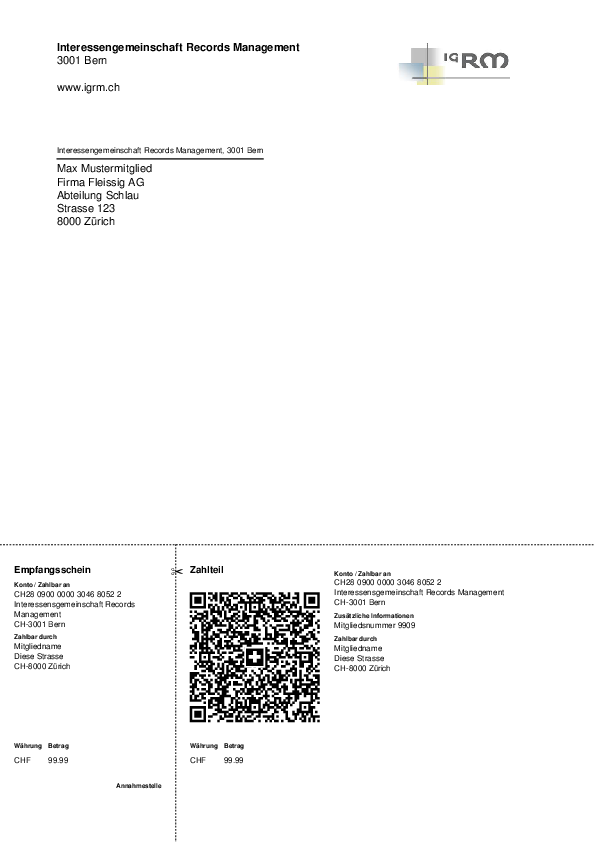

In [42]:
from svglib.svglib import svg2rlg
my_file = "c:/sk/tests/my.pdf"
def gen_pdf(filename):
    c = canvas.Canvas(filename, pagesize = A4)
    
    to = c.beginText()
    to.setTextOrigin(2*cm, height-1.8*cm)
    to.setFont("Helvetica-Bold", 11)
    to.textLine("Interessengemeinschaft Records Management")
    to.setFont("Helvetica", 11)
    to.textLine("3001 Bern")
    to.textLine("")
    to.textLine("www.igrm.ch")
    c.drawText(to)
    
    c.drawInlineImage('igrmlogo.jpg', 14*cm, height-3*cm, 4*cm, 1.5*cm)

    to = c.beginText()
    to.setTextOrigin(2*cm, height-5.4*cm)
    to.setFont("Helvetica", 8)
    to.textLine("Interessengemeinschaft Records Management, 3001 Bern")
    to.textLine("")
    to.setFont("Helvetica", 11)
    to.textLine("Max Mustermitglied")
    to.textLine("Firma Fleissig AG")
    to.textLine("Abteilung Schlau")
    to.textLine("Strasse 123")
    to.textLine("8000 Zürich")
    c.drawText(to)

    p = c.beginPath()
    p.moveTo(2*cm, height-5.6*cm)
    p.lineTo(9.3*cm, height-5.6*cm)
    p.close()
    c.drawPath(p)
    
    drawing = svg2rlg("c:/sk/tests/my.svg")
    renderPDF.draw(drawing, c, 0, 0)
    
    c.save()
gen_pdf(my_file)
show_pdf(my_file)